In [74]:
#Step 0. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score, f1_score,
    r2_score, classification_report
    )

In [75]:
#Step 1. Load data
url  = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [76]:
df_raw.sample(10, random_state=2025)

,package_name,review,polarity
622,com.uc.browser.en,good good for slow connection this uc minilit...,1
25,com.facebook.katana,can't install (error code: -505) have samsung...,0
307,com.tencent.mm,"bad new update, sight by swipe in chats gone ...",0
783,org.mozilla.firefox,"all you need, easy and gives you control open...",0
834,com.hamropatro,well done nicely designed .....this app had c...,1
109,com.linkedin.android,organization logo whenever i try to add my or...,0
339,com.viber.voip,issue in last online time it doesn't refresh ...,0
560,jabanaki.todo.todoly,"great, simple, recommend love this app. looki...",1
595,com.evernote,"neat idea, but let-down by no linux support. ...",0
509,com.Slack,free the gifs not reliable on a slower networ...,0


In [77]:
#Step 2. Preprocessing
df_baking = df_raw.copy()
df_baking = df_baking.drop(columns='package_name')

df_baking["review"] = df_baking["review"].str.strip().str.lower()
df_baking['review'] = df_baking['review'].astype("category")
df_baking['polarity'] = df_baking['polarity'].astype("category")

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   review    891 non-null    category
 1   polarity  891 non-null    category
dtypes: category(2)
memory usage: 42.1 KB


In [78]:
df.sample(10, random_state=2025)

,review,polarity
622,good good for slow connection this uc minilite...,1
25,can't install (error code: -505) have samsung ...,0
307,"bad new update, sight by swipe in chats gone p...",0
783,"all you need, easy and gives you control openn...",0
834,well done nicely designed .....this app had co...,1
109,organization logo whenever i try to add my org...,0
339,issue in last online time it doesn't refresh t...,0
560,"great, simple, recommend love this app. lookin...",1
595,"neat idea, but let-down by no linux support. a...",0
509,free the gifs not reliable on a slower network...,0


In [79]:
#Step 3. Exploratory Data Analysis
df_train, df_test = train_test_split(
    df, test_size=0.1,
    random_state=2025, stratify=df['polarity']
    )
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((801, 2), (90, 2))

In [80]:
display(df_train.describe().T)

,count,unique,top,freq
review,801,801,ŕ¤°ŕ¤žŕ¤žŕľŕ¤°ŕľ ŕ¤ yo hamro keyboard chai ...,1
polarity,801,2,0,525


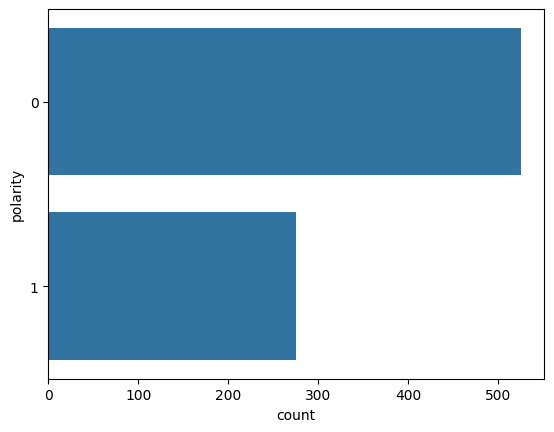

In [81]:
sns.countplot(df_train, y="polarity")
plt.show()

In [82]:
#Step 4. Machine Learning
X_train = df_train['review']
y_train = df_train['polarity']
X_test = df_test['review']
y_test = df_test['polarity']

vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [83]:
nv_model = BernoulliNB()
nv_model.fit(X_train, y_train)
y_pred = nv_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"\nReporte de clasificación:\n {classification_report(y_test, y_pred)}")

Accuracy: 77.78%

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85        59
           1       0.92      0.39      0.55        31

    accuracy                           0.78        90
   macro avg       0.84      0.69      0.70        90
weighted avg       0.81      0.78      0.75        90



Inicialmente observamos valores altos en algunas métricas para ambas clases. Para este modelo de análisis de sentimientos, nos interesa identificar la mayor cantidad posibles de positivos reales, por lo que priorizamos el recall(sensibilidad) de clase 1. Como tenemos un valor bajo de recall para esa clase, se hará una búsqueda de parámetros para encontrar una mejora con respecto a la cantidad de positivos reales.

In [84]:
clf_naive_cv = GridSearchCV(
    estimator = nv_model,
    param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_prior': [True, False]
}
)
clf_naive_cv.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:1209: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:1209: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:1209: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:1

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.0, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_prior': [True, False]})

In [85]:
best_model = clf_naive_cv.best_estimator_
best_model.fit(X_train,y_train)

y_hat_best = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_hat_best)*100:.2f}%")
print(f"\nReporte de clasificación:\n {classification_report(y_test, y_hat_best)}")

Accuracy: 81.11%

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        59
           1       0.85      0.55      0.67        31

    accuracy                           0.81        90
   macro avg       0.82      0.75      0.77        90
weighted avg       0.82      0.81      0.80        90



Con la mejora de parámetros mediante GridSearch, observamos una mejora significativa de 16 puntos porcentuales en el recall de la clase 1(de 39% a 55%).

#### Comparación con un modelo de RandomForest.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf_rf_model = RandomForestClassifier()
clf_rf_model.fit(X_train, y_train)
y_hat_rf = clf_rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_hat_rf)*100:.2f}%")
print(f"\nReporte de clasificación:\n {classification_report(y_test, y_hat_rf)}")

Accuracy: 78.89%

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.77      0.55      0.64        31

    accuracy                           0.79        90
   macro avg       0.78      0.73      0.75        90
weighted avg       0.79      0.79      0.78        90



Como el RandomForest maneja mejor el Overfitting de los datos, podemos decir que este modelo es un gran candidato para este tipo de problemas referente al la clasificación en base a los sentimientos de las personas con respecto a una aplicación o producto. RandomForest proporciona un balance robusto entre precisión y recall, evitando el overfitting que suele afectar a otros modelos con datos textuales.